In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gmm_em import *

In [2]:
z = np.array([.4, .6])
mus = np.array([[0, 3], [2, -3]])
covs = np.array([[[.1, 0], [0, .1]], [[.1, 0], [0, .1]]])

In [3]:
colors = ['b', 'r']

In [4]:
X1 = np.empty((0, 2))
X2 = np.empty((0, 2))
for i in range(10):
    z_k = np.random.choice(np.arange(len(z)), p=z)
    if z_k == 0:
        X1 = np.vstack([X1, np.random.multivariate_normal(mus[z_k], covs[z_k], size=100)])
    else:
        X2 = np.vstack([X2, np.random.multivariate_normal(mus[z_k], covs[z_k], size=100)])

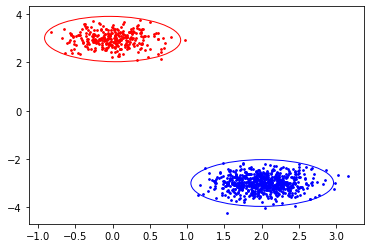

In [5]:
x1, y1 = X1.T
x2, y2 = X2.T
ax = plt.gca()
confidence_ellipse(x1, y1, ax, edgecolor='red')
confidence_ellipse(x2, y2, ax, edgecolor='blue')
ax.scatter(x1, y1, c='red', s=3)
ax.scatter(x2, y2, c='blue', s=3)

### Initialize mean and covariance and pi

In [10]:
zc = np.random.rand(2)
zc = zc / np.sum(zc)
mc = np.random.uniform(-5, 5, (2, 2))

from scipy import random, linalg
cc = []
for i in range(2):    
    size = 2
    A = random.rand(size, size)
    B = np.dot(A, A.transpose())
    cc.append(B)
cc = np.reshape(cc, (len(zc), 2, 2))

In [11]:
X = np.vstack([X1, X2])
N = len(X)
K = len(zc)

In [12]:
X1_c = np.empty((0, 2))
X2_c = np.empty((0, 2))
zc = np.reshape(zc, (1, 2))[0]
for i in range(10):
    z_k = np.random.choice(np.arange(len(zc)), p=zc)
    if z_k == 0:
        X1_c = np.vstack([X1_c, np.random.multivariate_normal(mc[z_k], cc[z_k], size=100)])
    else:
        X2_c = np.vstack([X2_c, np.random.multivariate_normal(mc[z_k], cc[z_k], size=100)])

x1_c, y1_c = X1_c.T
x2_c, y2_c = X2_c.T
ax = plt.gca()
confidence_ellipse(x1_c, y1_c, ax, edgecolor='black')
confidence_ellipse(x2_c, y2_c, ax, edgecolor='green')
# Old confidences and data
confidence_ellipse(x1, y1, ax, edgecolor='red')
confidence_ellipse(x2, y2, ax, edgecolor='blue')
ax.scatter(x1, y1, c='red', s=3)
ax.scatter(x2, y2, c='blue', s=3)
plt.savefig("em_0")
plt.close()

In [13]:
ll = log_likelihood(N, K, mc, cc, zc, X)
new_ll = 1000000000000
print("Starting EM...")
image_nr = 1
while abs(ll - new_ll) > 1**-6:
    ll = new_ll
    resp = e_step(N, K, mc, cc, zc, X)
    mc, cc, zc = m_step(N, K, X, resp)
    print(mc)
    new_ll = log_likelihood(N, K, mc, cc, zc, X)
    
    X1_c = np.empty((0, 2))
    X2_c = np.empty((0, 2))
    zc = np.reshape(zc, (1, 2))[0]
    for i in range(10):
        z_k = np.random.choice(np.arange(len(zc)), p=zc)
        if z_k == 0:
            X1_c = np.vstack([X1_c, np.random.multivariate_normal(mc[z_k], cc[z_k], size=100)])
        else:
            X2_c = np.vstack([X2_c, np.random.multivariate_normal(mc[z_k], cc[z_k], size=100)])
    
    x1_c, y1_c = X1_c.T
    x2_c, y2_c = X2_c.T
    ax = plt.gca()
    confidence_ellipse(x1_c, y1_c, ax, edgecolor='black')
    confidence_ellipse(x2_c, y2_c, ax, edgecolor='green')
    # Old confidences and data
    confidence_ellipse(x1, y1, ax, edgecolor='red')
    confidence_ellipse(x2, y2, ax, edgecolor='blue')
    ax.scatter(x1, y1, c='red', s=3)
    ax.scatter(x2, y2, c='blue', s=3)
    plt.savefig("em_" + str(image_nr))
    plt.close()
    image_nr += 1
    
print("Done!")

Starting EM...
[[ 0.56943764  2.34262822]
 [ 1.41163119 -1.2300688 ]]
[[ 0.62178969  2.46648002]
 [ 1.40874745 -1.21907769]]
Done!


#### From here on is TODO

In [14]:
import pandas
data = pandas.read_csv("faithful.csv")
XF = data.loc[:, "eruptions":"waiting"].values

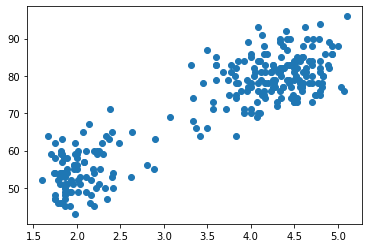

In [15]:
xf, yf = XF.T
plt.plot(xf, yf, 'o')

In [39]:
zc = np.random.rand(2)
zc = zc / np.sum(zc)
mc1 = np.random.uniform(1, 5, (2, 1))
mc2 = np.random.uniform(40, 110, (2, 1))
mc = np.hstack([mc1, mc2])
print(mc)

from scipy import random, linalg
cc = []
for i in range(2):    
    size = 2
    A = random.rand(size, size)
    B = np.dot(A, A.transpose())
    cc.append(B)
cc = np.reshape(cc, (len(zc), 2, 2))

[[ 4.72832051 79.3783265 ]
 [ 3.19488755 59.09461296]]


In [40]:
N = len(XF)
K = len(zc)

In [41]:
XF1_c = np.empty((0, 2))
XF2_c = np.empty((0, 2))
zc = np.reshape(zc, (1, 2))[0]
for i in range(10):
    z_k = np.random.choice(np.arange(len(zc)), p=zc)
    if z_k == 0:
        XF1_c = np.vstack([X1_c, np.random.multivariate_normal(mc[z_k], cc[z_k], size=100)])
    else:
        XF2_c = np.vstack([X2_c, np.random.multivariate_normal(mc[z_k], cc[z_k], size=100)])

xF1_c, yF1_c = X1_c.T
xF2_c, yF2_c = X2_c.T
ax = plt.gca()
confidence_ellipse(xF1_c, yF1_c, ax, edgecolor='green')
confidence_ellipse(xF2_c, yF2_c, ax, edgecolor='red')

ax.scatter(xf, yf, c='blue', s=3)
plt.savefig("em_f_0")
plt.close()

In [42]:
XF

array([[ 3.6  , 79.   ],
       [ 1.8  , 54.   ],
       [ 3.333, 74.   ],
       [ 2.283, 62.   ],
       [ 4.533, 85.   ],
       [ 2.883, 55.   ],
       [ 4.7  , 88.   ],
       [ 3.6  , 85.   ],
       [ 1.95 , 51.   ],
       [ 4.35 , 85.   ],
       [ 1.833, 54.   ],
       [ 3.917, 84.   ],
       [ 4.2  , 78.   ],
       [ 1.75 , 47.   ],
       [ 4.7  , 83.   ],
       [ 2.167, 52.   ],
       [ 1.75 , 62.   ],
       [ 4.8  , 84.   ],
       [ 1.6  , 52.   ],
       [ 4.25 , 79.   ],
       [ 1.8  , 51.   ],
       [ 1.75 , 47.   ],
       [ 3.45 , 78.   ],
       [ 3.067, 69.   ],
       [ 4.533, 74.   ],
       [ 3.6  , 83.   ],
       [ 1.967, 55.   ],
       [ 4.083, 76.   ],
       [ 3.85 , 78.   ],
       [ 4.433, 79.   ],
       [ 4.3  , 73.   ],
       [ 4.467, 77.   ],
       [ 3.367, 66.   ],
       [ 4.033, 80.   ],
       [ 3.833, 74.   ],
       [ 2.017, 52.   ],
       [ 1.867, 48.   ],
       [ 4.833, 80.   ],
       [ 1.833, 59.   ],
       [ 4.783, 90.   ],


In [43]:
ll = log_likelihood(N, K, mc, cc, zc, XF)
new_ll = 1000000000000
print("Starting EM...")
image_nr = 1
while abs(ll - new_ll) > 1**-6:
    ll = new_ll
    resp = e_step(N, K, mc, cc, zc, XF)
    mc, cc, zc = m_step(N, K, XF, resp)
    print(mc)
    new_ll = log_likelihood(N, K, mc, cc, zc, XF)
    
    
    XF1_c = np.empty((0, 2))
    XF2_c = np.empty((0, 2))
    zc = np.reshape(zc, (1, 2))[0]
    for i in range(10):
        z_k = np.random.choice(np.arange(len(zc)), p=zc)
        if z_k == 0:
            XF1_c = np.vstack([XF1_c, np.random.multivariate_normal(mc[z_k], cc[z_k], size=100)])
        else:
            XF2_c = np.vstack([XF2_c, np.random.multivariate_normal(mc[z_k], cc[z_k], size=100)])
    
    xF1_c, yF1_c = XF1_c.T
    xF2_c, yF2_c = XF2_c.T
    ax = plt.gca()
    confidence_ellipse(xF1_c, yF1_c, ax, edgecolor='green')
    confidence_ellipse(xF2_c, yF2_c, ax, edgecolor='red')
    
    ax.scatter(xf, yf, c='red', s=3)
    plt.savefig("em_f_" + str(image_nr))
    plt.close()
    print(image_nr)
    image_nr += 1
    
print("Done!")

Starting EM...
[[nan nan]
 [nan nan]]


ValueError: array must not contain infs or NaNs